In [1]:
# Importing numpy for numerical operations and array manipulation
import numpy as np

# Importing pandas for data handling and analysis
import pandas as pd

# Importing matplotlib.pyplot for creating static, animated, and interactive visualizations
import matplotlib.pyplot as plt

# Importing matplotlib.dates for working with dates in matplotlib plots
import matplotlib.dates as mdates

---

# Reading csv file and transforming data

In [2]:
df = pd.read_csv("datasets/sales.csv")
df.head()

,Date,Product,Sales,Units,Revenue
0,2023-01-01,Tablet,832,5,4160
1,2023-01-01,Laptop,1278,6,7668
2,2023-01-01,Laptop,1455,9,13095
3,2023-01-01,Laptop,1050,8,8400
4,2023-01-03,Laptop,905,7,6335


In [3]:
# Convert the 'Date' column in the DataFrame to datetime format
df["Date"] = pd.to_datetime(df["Date"])

In [4]:
# Create a new column 'day_name' with the day of the week for each date
# The days are categorized in a specific order (Sunday to Saturday)
df['day_name'] = pd.Categorical(
    df['Date'].dt.day_name(),  # Extract the day name from the 'Date' column
    categories=['Sunday', 'Monday','Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'],  # Define the order of the days
    ordered=True  # Set the order of the days as ordered
)


In [5]:
# Create a mapping of month numbers to corresponding seasons
mapping_season = {
    1 : "Winter", 2: "Winter", 3: "Winter",  # Winter: December, January, February
    4 : "Spring", 5 : "Spring", 6 : "Spring",  # Spring: March, April, May
    7 : "Summer", 8 : "Summer", 9 : "Summer",  # Summer: June, July, August
    10 : "Autumn", 11 : "Autumn", 12 : "Autumn",  # Autumn: September, October, November
}

# Map the month from the 'Date' column to seasons and create a new 'season' column
df['season'] = pd.Categorical(
    df['Date'].dt.month.map(mapping_season),  # Map the month number to the corresponding season
    ["Spring","Summer","Autumn","Winter"],  # Define the order of the seasons
    ordered=True  # Set the order of seasons as ordered
)


In [6]:
# Create a list of month names
months = [
    "January", "February", "March", "April", 
    "May", "June", "July", "August", 
    "September", "October", "November", "December"
]

# Create a mapping of month numbers (1-12) to month names
mapping_month = {}
for i in range(1, 13):
    mapping_month[i] = months[i - 1]  # Map each month number to the corresponding month name
    
# Map the month number from the 'Date' column to month names and create a new 'month' column
df['month'] = pd.Categorical(
    df['Date'].dt.month.map(mapping_month),  # Map the month number to the corresponding month name
    months,  # Define the order of the months
    ordered=True  # Set the order of months as ordered
)


In [7]:
# Randomly sample 10 rows from the DataFrame
df.sample(10)

,Date,Product,Sales,Units,Revenue,day_name,season,month
310,2023-04-26,Tablet,622,7,4354,Wednesday,Spring,April
877,2023-11-20,Smartphone,943,4,3772,Monday,Autumn,November
443,2023-06-11,Tablet,191,7,1337,Sunday,Spring,June
174,2023-03-14,Headphones,1085,8,8680,Tuesday,Winter,March
288,2023-04-19,Headphones,808,6,4848,Wednesday,Spring,April
520,2023-07-07,Tablet,208,8,1664,Friday,Summer,July
103,2023-02-12,Smartphone,914,6,5484,Sunday,Winter,February
633,2023-08-16,Tablet,757,8,6056,Wednesday,Summer,August
539,2023-07-15,Tablet,826,2,1652,Saturday,Summer,July
127,2023-02-20,Smartphone,298,7,2086,Monday,Winter,February


In [8]:
# Display a summary of the DataFrame, including column data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1000 non-null   datetime64[ns]
 1   Product   1000 non-null   object        
 2   Sales     1000 non-null   int64         
 3   Units     1000 non-null   int64         
 4   Revenue   1000 non-null   int64         
 5   day_name  1000 non-null   category      
 6   season    1000 non-null   category      
 7   month     1000 non-null   category      
dtypes: category(3), datetime64[ns](1), int64(3), object(1)
memory usage: 43.1+ KB


# Daily sales average

In [9]:
# Group the DataFrame by 'Date' and calculate the average 'Revenue' for each day
average_daily_sales = df.groupby("Date")["Revenue"].mean()

# Display the average daily sales
average_daily_sales


Date
2023-01-01    8330.750000
2023-01-03    5413.000000
2023-01-04    5507.000000
2023-01-05    4885.000000
2023-01-06    3996.000000
                 ...     
2023-12-27    3084.500000
2023-12-28    6052.500000
2023-12-29    8688.000000
2023-12-30    2414.333333
2023-12-31    3967.500000
Name: Revenue, Length: 349, dtype: float64

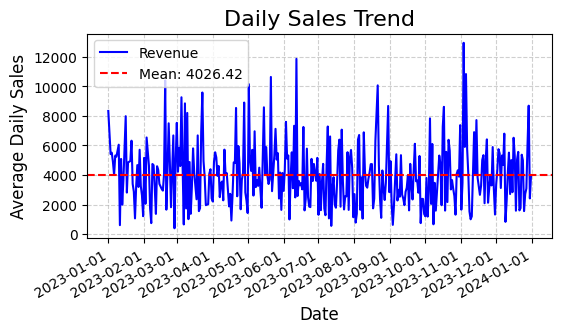

In [10]:
# Set the size of the figure (width, height in inches)
plt.figure(figsize=(6, 3))

# Plot the average daily sales with a blue line
average_daily_sales.plot(linestyle='-', color='blue')

# Calculate the overall mean of the average daily sales
mean_sales = average_daily_sales.mean()

# Add a horizontal line for the mean sales value
plt.axhline(mean_sales, color='red', linestyle='--', label=f'Mean: {mean_sales:.2f}')

# Set the title of the plot
plt.title('Daily Sales Trend', fontsize=16)

# Label the X and Y axes
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Daily Sales', fontsize=12)

# Add grid lines with dashed style and a bit of transparency
plt.grid(True, linestyle='--', alpha=0.6)

# Format the X-axis to display dates in 'YYYY-MM-DD' format
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Set the X-axis major locator to display one tick per month
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

# Display the legend with the mean value
plt.legend()

# Show the plot
plt.show()


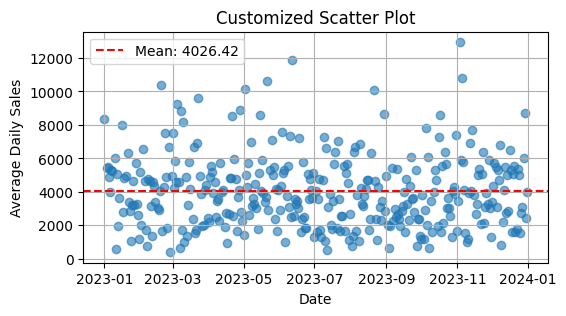

In [11]:
# Create a figure and axis with a specific size
fig, ax = plt.subplots(figsize=(6, 3))

# Calculate the overall mean of the average daily sales
mean_sales = average_daily_sales.mean()

# Add a horizontal line for the mean sales value
plt.axhline(mean_sales, color='red', linestyle='--', label=f'Mean: {mean_sales:.2f}')

# Create a scatter plot for the average daily sales with customized points
scatter = ax.scatter(average_daily_sales.index, average_daily_sales, alpha=0.6)

# Customize the plot with a title and labels for the axes
ax.set_title("Customized Scatter Plot")
ax.set_xlabel("Date")
ax.set_ylabel('Average Daily Sales')

# Add grid lines to the plot
ax.grid(True)

# Display the legend
plt.legend()

# Show the plot
plt.show()


In [12]:
df

,Date,Product,Sales,Units,Revenue,day_name,season,month
0,2023-01-01,Tablet,832,5,4160,Sunday,Winter,January
1,2023-01-01,Laptop,1278,6,7668,Sunday,Winter,January
2,2023-01-01,Laptop,1455,9,13095,Sunday,Winter,January
3,2023-01-01,Laptop,1050,8,8400,Sunday,Winter,January
4,2023-01-03,Laptop,905,7,6335,Tuesday,Winter,January
...,...,...,...,...,...,...,...,...
995,2023-12-30,Headphones,537,8,4296,Saturday,Autumn,December
996,2023-12-30,Smartphone,604,3,1812,Saturday,Autumn,December
997,2023-12-30,Smartphone,227,5,1135,Saturday,Autumn,December
998,2023-12-31,Laptop,840,9,7560,Sunday,Autumn,December


## Average Monthly Sales

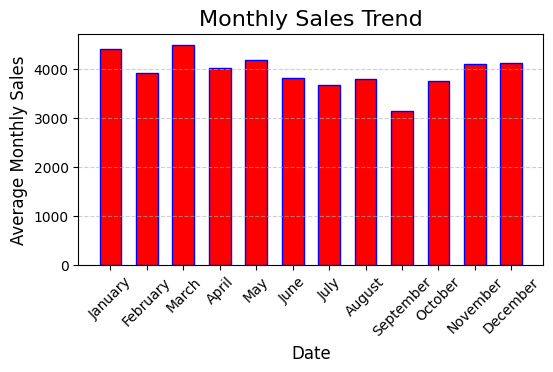

In [13]:
# # Calculate the average monthly sales by grouping the DataFrame by 'month' and taking the mean of 'Revenue'
average_monthly_sales = df.groupby("month", observed=True)["Revenue"].mean()

# Create a figure with specific size
plt.figure(figsize=(6, 3))

# Create a bar plot for the average monthly sales with red bars and blue edges
plt.bar(average_monthly_sales.index, average_monthly_sales, color='red', edgecolor='blue', width=0.6)

# Add details to the plot
plt.title('Monthly Sales Trend', fontsize=16)  # Set the title
plt.xlabel('Date', fontsize=12)  # Label the X-axis
plt.ylabel('Average Monthly Sales', fontsize=12)  # Label the Y-axis

# Rotate the X-axis labels to make them readable
plt.xticks(rotation=45)

# Add grid lines to the Y-axis for better readability
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Show the plot
plt.show()


# Average Sales Per Season

In [14]:
# Calculate the average sales per season by grouping the DataFrame by 'season' and taking the mean of 'Revenue'
average_sales_per_season = df.groupby("season", observed=True)["Revenue"].mean()

# Sort the seasons in the correct order (Spring, Summer, Autumn, Winter)
average_sales_per_season = average_sales_per_season.sort_index()


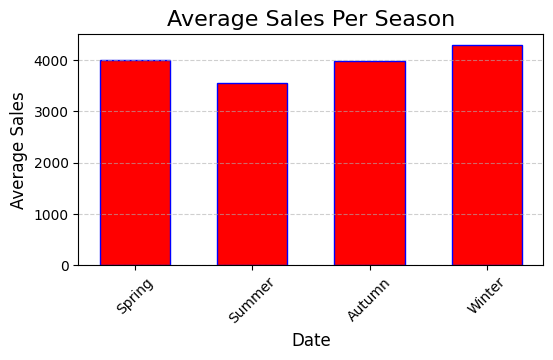

In [15]:
# Create a figure with specific size
plt.figure(figsize=(6, 3))

# Create a bar plot for the average sales per season with red bars and blue edges
plt.bar(average_sales_per_season.index, average_sales_per_season, color='red', edgecolor='blue', width=0.6)

# Add details to the plot
plt.title('Average Sales Per Season', fontsize=16)  # Set the title
plt.xlabel('Date', fontsize=12)  # Label the X-axis
plt.ylabel('Average Sales', fontsize=12)  # Label the Y-axis

# Rotate the X-axis labels to make them readable
plt.xticks(rotation=45)

# Add grid lines to the Y-axis for better readability
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Show the plot
plt.show()


---

# Sales Amount Per Product

In [16]:
# Calculate the total sales amount (units sold) per product by grouping the DataFrame by 'Product' 
# and summing the 'Units' for each product, then sorting the values in descending order
sales_amount_per_product = df.groupby("Product", observed=True)["Units"].sum().sort_values(ascending=False)


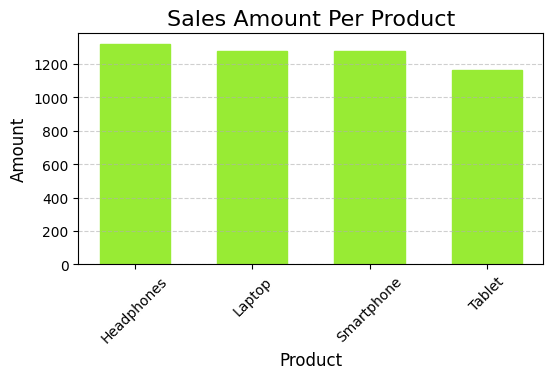

In [17]:
# Create a figure with specific size
plt.figure(figsize=(6, 3))

# Create a bar plot for the total sales amount per product with a green color and matching edges
plt.bar(sales_amount_per_product.index, sales_amount_per_product, color='#98eb34', edgecolor='#98eb34', width=0.6)

# Add details to the plot
plt.title('Sales Amount Per Product', fontsize=16)  # Set the title
plt.xlabel('Product', fontsize=12)  # Label the X-axis
plt.ylabel('Amount', fontsize=12)  # Label the Y-axis

# Rotate the X-axis labels to make them readable
plt.xticks(rotation=45)

# Add grid lines to the Y-axis for better readability
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Show the plot
plt.show()


In [18]:
# Calculate the total sales (units sold) for each product in each season 
# by grouping the DataFrame by 'Product' and 'season', then summing the 'Units'
sales_of_each_product_each_season = df.groupby(["Product", "season"], observed=True)["Units"].sum()

# Reshape the DataFrame to have 'season' as columns and 'Product' as rows
sales_of_each_product_each_season = sales_of_each_product_each_season.unstack()


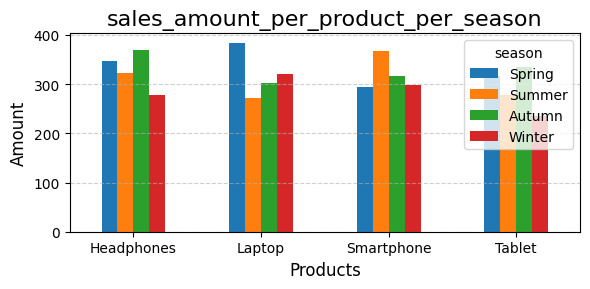

In [19]:
# Plot the DataFrame with a bar chart, using the 'sales_of_each_product_each_season' DataFrame
sales_of_each_product_each_season.plot(kind='bar', figsize=(6, 3))

# Adding title and labels
plt.title('sales_amount_per_product_per_season', fontsize=16)  # Set the title of the plot
plt.xlabel('Products', fontsize=12)  # Label for the X-axis
plt.ylabel('Amount', fontsize=12)  # Label for the Y-axis

# Rotate the X-axis labels for better readability (set to 0 for horizontal)
plt.xticks(rotation=0)

# Add grid lines on the Y-axis for better readability
plt.grid(True, axis='y', linestyle='--', alpha=0.6)

# Display the plot with tight layout to adjust the spacing
plt.tight_layout()

# Show the plot
plt.show()


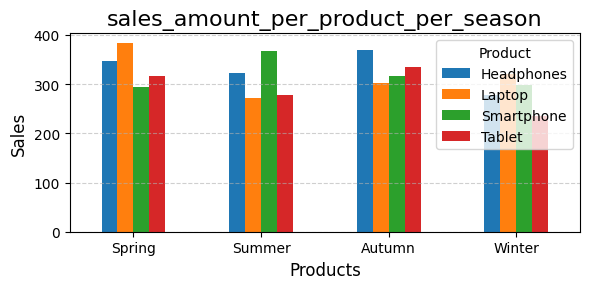

In [20]:
# Transpose the DataFrame to swap rows and columns
sales_of_each_product_each_season = sales_of_each_product_each_season.T

# Plot the transposed DataFrame with a bar chart
sales_of_each_product_each_season.plot(kind='bar', figsize=(6, 3))

# Adding title and labels
plt.title('sales_amount_per_product_per_season', fontsize=16)  # Set the title
plt.xlabel('Products', fontsize=12)  # Label for the X-axis
plt.ylabel('Sales', fontsize=12)  # Label for the Y-axis

# Rotate the X-axis labels for better readability (set to 0 for horizontal)
plt.xticks(rotation=0)

# Add grid lines on the Y-axis for better readability
plt.grid(True, axis='y', linestyle='--', alpha=0.6)

# Display the plot with tight layout to adjust the spacing
plt.tight_layout()

# Show the plot
plt.show()


In [21]:
# Calculate the total sales (units sold) for each product on each weekday
# by grouping the DataFrame by 'day_name' and 'Product', then summing the 'Units'
sales_quantity_per_product_per_weekday = df.groupby(["day_name", "Product"], observed=True)["Units"].sum()

# Reshape the DataFrame to have 'Product' as columns and 'day_name' as rows
sales_quantity_per_product_per_weekday = sales_quantity_per_product_per_weekday.unstack()


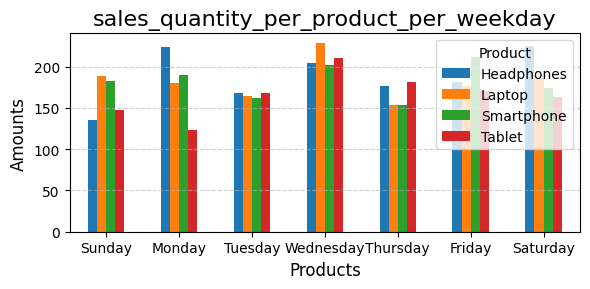

In [22]:
# Plot the 'sales_quantity_per_product_per_weekday' DataFrame with a bar chart
sales_quantity_per_product_per_weekday.plot(kind='bar', figsize=(6, 3))

# Adding title and labels
plt.title('sales_quantity_per_product_per_weekday', fontsize=16)  # Set the title
plt.xlabel('Products', fontsize=12)  # Label for the X-axis
plt.ylabel('Amounts', fontsize=12)  # Label for the Y-axis

# Rotate the X-axis labels for better readability (set to 0 for horizontal)
plt.xticks(rotation=0)

# Add grid lines on the Y-axis for better readability
plt.grid(True, axis='y', linestyle='--', alpha=0.6)

# Display the plot with tight layout to adjust the spacing
plt.tight_layout()

# Show the plot
plt.show()


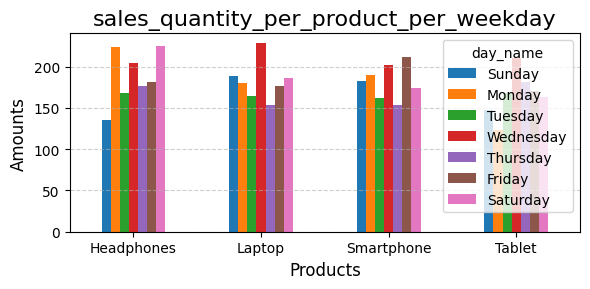

In [23]:
# Transpose the 'sales_quantity_per_product_per_weekday' DataFrame and plot it with a bar chart
sales_quantity_per_product_per_weekday.T.plot(kind='bar', figsize=(6, 3))

# Adding title and labels
plt.title('sales_quantity_per_product_per_weekday', fontsize=16)  # Set the title
plt.xlabel('Products', fontsize=12)  # Label for the X-axis
plt.ylabel('Amounts', fontsize=12)  # Label for the Y-axis

# Rotate the X-axis labels for better readability (set to 0 for horizontal)
plt.xticks(rotation=0)

# Add grid lines on the Y-axis for better readability
plt.grid(True, axis='y', linestyle='--', alpha=0.6)

# Display the plot with tight layout to adjust the spacing
plt.tight_layout()

# Show the plot
plt.show()
